In [373]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [374]:
import os
import cv2
shapes={'circle':0,'kite':1,"parallelogram":2,'square':3,'trapezoid':4,'triangle':5}
X = []
y = []

X_train = []
y_train = []
X_test = []
y_test = []

for shape in shapes:
    pth='D:/Downloads/COLLEGE_WORK/MLAILABS/DRAWPROJECT/aiml- update -1/aiml- update -1/archive/six-shapes-dataset-v1/six-shapes/train/'+shape
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(28,28))
        X_train.append(img)
        y_train.append(shapes[shape])
        
for shape in shapes:
    pth='D:/Downloads/COLLEGE_WORK/MLAILABS/DRAWPROJECT/aiml- update -1/aiml- update -1/archive/six-shapes-dataset-v1/six-shapes/test/'+shape
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(28,28))
        X_test.append(img)
        y_test.append(shapes[shape])

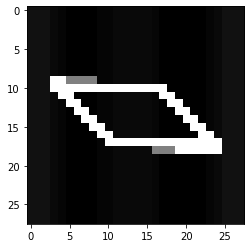

In [375]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[4000], cmap=plt.cm.binary)
plt.show()

In [376]:
y_train[4000]

2

In [377]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [378]:
X_trainr = np.array(X_train).reshape(-1, 28, 28, 1)
X_testr = np.array(X_test).reshape(-1, 28, 28, 1)

In [379]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [380]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))
          
model.add(Dense(6))
model.add(Activation("softmax"))

In [381]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_54 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_55 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [382]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [383]:
model.fit(X_trainr, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
197/197 [==============================] - 4s 19ms/step - loss: 1.0376 - accuracy: 0.5692 - val_loss: 7.7774 - val_accuracy: 0.0044
Epoch 2/5
197/197 [==============================] - 4s 18ms/step - loss: 0.1472 - accuracy: 0.9522 - val_loss: 8.8413 - val_accuracy: 0.3781
Epoch 3/5
197/197 [==============================] - 4s 18ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 9.2767 - val_accuracy: 0.3996
Epoch 4/5
197/197 [==============================] - 4s 19ms/step - loss: 0.0498 - accuracy: 0.9852 - val_loss: 9.4873 - val_accuracy: 0.4019
Epoch 5/5
197/197 [==============================] - 4s 20ms/step - loss: 0.0362 - accuracy: 0.9879 - val_loss: 9.9490 - val_accuracy: 0.3985


In [384]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 5ms/step - loss: 3.0320 - accuracy: 0.8167


[3.0319666862487793, 0.8166666626930237]

In [385]:
predictions = model.predict([X_testr])

In [388]:
print(np.argmax(predictions[100]))

0


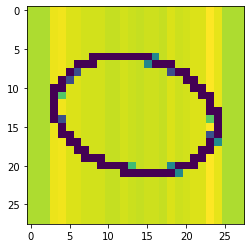

In [389]:
plt.imshow(X_testr[100])
plt.show()

In [390]:
# serialize model to JSON
model_json = model.to_json()
with open("model_shapes.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_shapes.h5")
print("Saved model to disk")

Saved model to disk


In [391]:
json_file = open('model_shapes.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_shapes.h5")
print("Loaded model from disk")

Loaded model from disk


In [392]:
predict = loaded_model.predict(new_img)

In [393]:
print(np.argmax(predict))

1


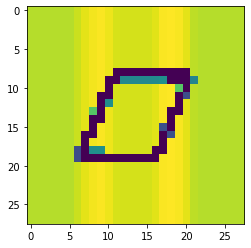

In [310]:
plt.imshow(X_test[500])
plt.show()

In [45]:
array_x = np.array(X_train_t)
array_y=np.array(y_train_t)
arrayxt=np.array(X_test_t)
arrayyt=np.array(y_test_t)
array_x=array_x/255
arrayxt=arrayxt/255

In [ ]:
model_n.fit(array_x,array_y,epochs=10)

In [ ]:
a=model_n.predict([arrayxt])

In [ ]:
np.argmax(a[1000])

In [ ]:
plt.imshow(arrayxt[1000])

In [574]:
import cv2
input_img=cv2.imread('test7.png')

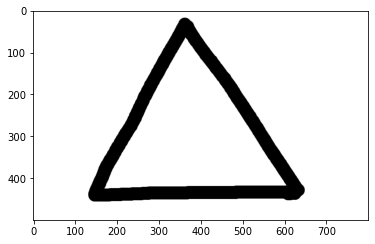

In [575]:
plt.imshow(input_img)

In [576]:
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

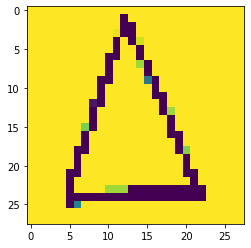

In [577]:
resized = cv2.resize(gray, (28,28))
plt.imshow(resized)

In [578]:
resized=np.array(resized)

In [579]:
resized=resized//255

In [580]:
resized

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 

In [581]:
new_img = tf.keras.utils.normalize(resized, axis=1)

In [582]:
new_img = np.array(new_img)

In [583]:
new_img = np.array(new_img).reshape(-1, 28, 28, 1)

In [584]:
predict = loaded_model.predict(new_img)

In [585]:
print(np.argmax(predict))

3


In [4]:
from keras.models import model_from_json

In [5]:
json_file = open('model_shapes_new.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_shapes_new.h5")
print("Loaded model from disk")

Loaded model from disk


In [201]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
input_img=cv2.imread('test7.png')

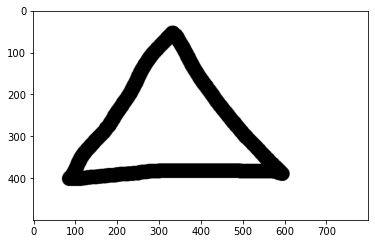

In [202]:
plt.imshow(input_img)
plt.show()

In [203]:
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

In [204]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)

In [205]:
new_img = np.array(resized / 255)

In [206]:
new_img = new_img.reshape(1, 28, 28)

In [207]:
new_img

array([[[1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ,
         0.97254902, 0.22745098, 0.76470588, 1.        , 1.        ,
         1.

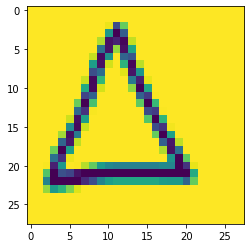

In [208]:
plt.imshow(resized)
plt.show()

In [209]:
prediction = loaded_model.predict(new_img)

In [210]:
print(np.argmax(prediction))

5
